# Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os

## Load data for one event

In [2]:
path = '../data/train'

In [3]:
with open(os.path.join(path, 'event1.pkl'), 'rb') as f:
    data = pkl.load(f)

In [5]:
classes = {11: 'electron', 13: 'muon', 211: 'pion', 321: 'kaon', 2212: 'proton'}

In [6]:
def show_images(data):
    images, labels = data[0], data[1]
    
    fig = plt.figure(figsize=(25,4))
    for i in np.arange(20):
        ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
        ax.imshow(images[i])
        ax.set_title(classes[labels[i]])
        

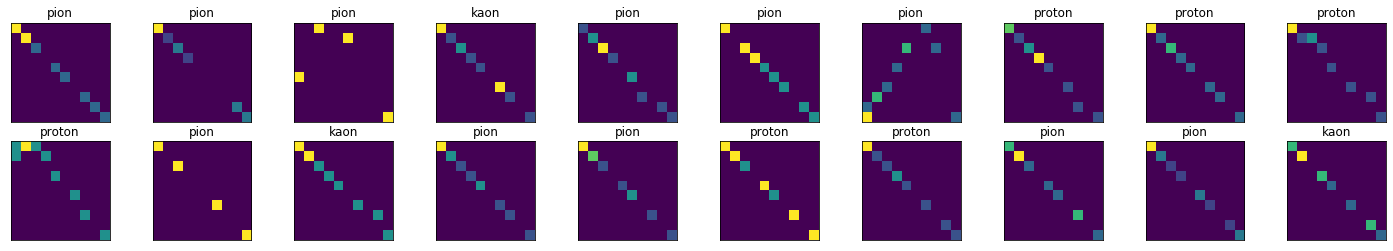

In [7]:
show_images(data)

## Load and combine the data for all the events

In [10]:
for i in range(1, 351):
    event = 'event' + str(i) + '.pkl'
    with open(os.path.join(path, event), 'rb') as f:
        event_data = pkl.load(f)
    
    if i==1:
        aggregate_data = event_data
    else:
        aggregate_data = np.concatenate((aggregate_data, event_data), axis=1)

In [11]:
aggregate_data.shape

(2, 1176475)

## Save aggregated data

In [12]:
with open(os.path.join(path, 'combined.pkl'), 'wb') as f:
    pkl.dump(aggregate_data, f)

In [13]:
with open(os.path.join(path, 'combined.pkl'), 'rb') as f:
    aggregate_data = pkl.load(f)

In [14]:
aggregate_data.shape

(2, 1176475)

## Distribution of data

In [17]:
from collections import Counter

In [27]:
counts = Counter(aggregate_data[1])
counts

Counter({211: 906047, 321: 154323, 2212: 111730, 13: 1237, 11: 3138})

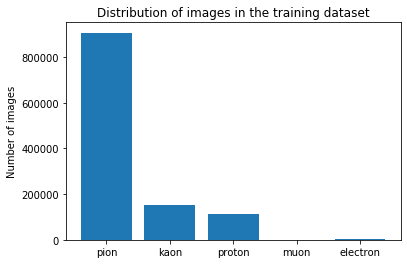

In [36]:
labels = [classes[i] for i in list(counts.keys())]

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), labels)
plt.ylabel('Number of images')
plt.title('Distribution of images in the training dataset')
plt.show()